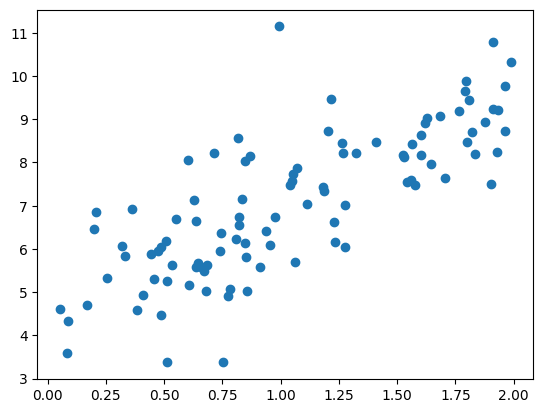

In [1]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 2 * np.random.rand(m,1)
Y =  4 + 3 * X + np.random.randn(m,1)
plt.scatter(X,Y)

In [2]:
X_b = np.c_[np.ones((m, 1)), X]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
theta

array([[4.54450405],
       [2.41315016]])

In [15]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
X_norm = np.c_[np.ones((m,1)),X]
eta = 0.01
n_iterations = 1000
theta = np.random.randn(2,1)

for iteration in range(n_iterations) :
    gradient_vector = (2 / m) * X_norm.T.dot(X_norm.dot(theta)-Y)
    theta = theta - eta * gradient_vector

theta

array([[4.46783645],
       [2.4771308 ]])

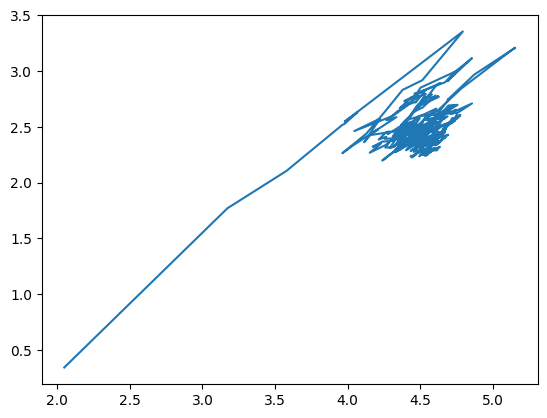

In [52]:
n_epochs = 50
t0, t1 = 5, 50

def learning_scheldue(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)
theta_history = np.zeros((2,m*n_epochs))
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_norm[random_index:random_index+1]
        yi = Y[random_index:random_index+1]
        gradient_vector = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_scheldue(m * epoch + i)
        theta = theta - eta * gradient_vector
        theta_history[:,epoch * m + i][0] = theta[0][0]
        theta_history[:,epoch * m + i][1] = theta[1][0]

plt.plot(theta_history[0],theta_history[1])